<a href="https://colab.research.google.com/github/MRazin172/MLLab_2/blob/main/Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer


In [2]:
Customers=pd.read_csv('/content/Customers.csv')

In [3]:
Customers.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
Customers = pd.read_csv('/content/Customers.csv')
X_age = Customers[['Age']]
n_bins = 4
strategy = 'uniform'
bin_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
X_age_binned = bin_encoder.fit_transform(X_age)
binned_df = pd.DataFrame(X_age_binned, columns=['Age_Binned'])
Customers_binned = pd.concat([Customers, binned_df], axis=1)
print(Customers_binned.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  Age_Binned  
0     Healthcare                1            4         0.0  
1       Engineer                3            3         0.0  
2       Engineer                1            1         0.0  
3         Lawyer                0            2         0.0  
4  Entertainment                2            6         1.0  


In [5]:
print(Customers_binned)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  Age_Binned  
0        Healthcare    

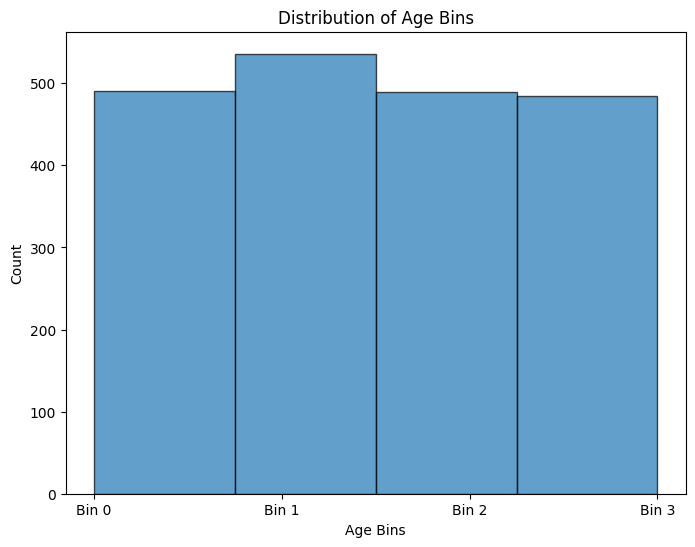

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(Customers_binned['Age_Binned'], bins=n_bins, edgecolor='black', alpha=0.7)
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Distribution of Age Bins')
plt.xticks(range(n_bins), [f'Bin {i}' for i in range(n_bins)])
plt.show()

In [7]:
le = LabelEncoder()
le.fit(Customers['Gender'])
Customers['Gender_encoded'] = le.transform(Customers['Gender'])
print(Customers)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  Gender_encoded  
0        Healthcare

In [8]:
covariance = Customers['Age'].cov(Customers['Annual Income ($)'])
print(covariance)

27798.605662831425


In [16]:
correlation_matrix = np.cov(Customers['Annual Income ($)'],Customers['Gender_encoded'])
correlation_matrix

array([[2.09210522e+09, 1.05669984e+02],
       [1.05669984e+02, 2.41471736e-01]])

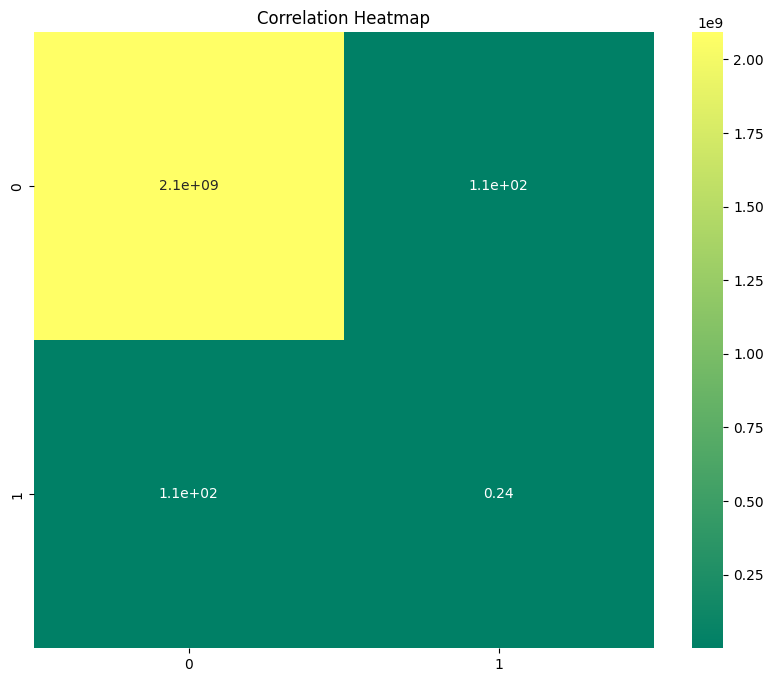

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="summer")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
contingency_table2 = pd.crosstab(Customers["Gender_encoded"], Customers["Family Size"])
chi_square_statistic, p_value, df_value, expected_values = stats.chi2_contingency(contingency_table2)
print(chi_square_statistic, p_value)



5.270568116583443 0.7283046499207628


In [21]:
contingency_table2 = pd.crosstab(Customers["Gender_encoded"], Customers["Spending Score (1-100)"])
chi_square_statistic, p_value, df_value, expected_values = stats.chi2_contingency(contingency_table2)
print(chi_square_statistic, p_value)

105.01075748995939 0.3462248572561377


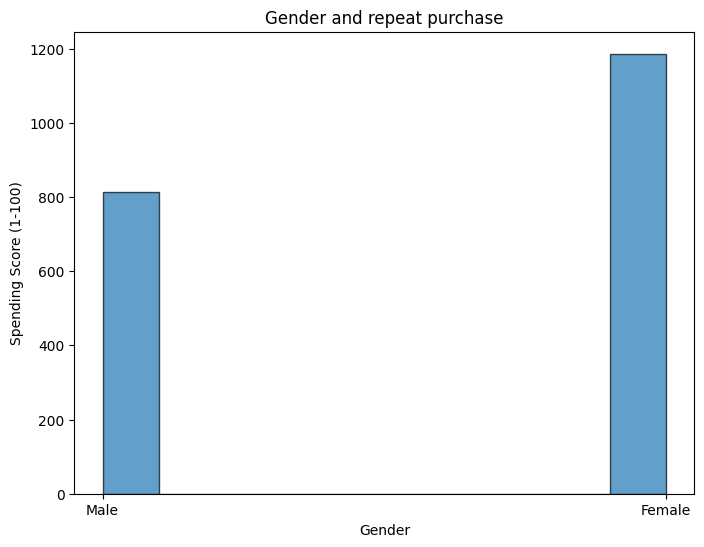

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(Customers_binned['Gender'] ,edgecolor='black', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Gender and Spending Score')
plt.show()

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Create a sample DataFrame (replace this with your actual data)
data = {'Gender','Spending Score (1-100)'}
Customers = pd.DataFrame(data)

# Create a contingency table
contingency_table2 = pd.crosstab(Customers["Gender"], Customers["Spending Score (1-100)"])
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table2)

# Stacked bar plot
fig, ax = plt.subplots()
ind = np.arange(len(contingency_table2.columns))

bottom = None
for gender in contingency_table2.index:
    counts = contingency_table2.loc[gender]
    bars = ax.bar(ind, counts, label=gender, bottom=bottom)
    if bottom is None:
        bottom = np.zeros(len(counts))
    bottom += counts

ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Gender')
ax.set_title('Gender vs Spending Score (1-100)')
ax.set_xticks(ind)
ax.set_xticklabels(contingency_table2.columns)
ax.legend()

plt.show()


KeyError: ignored